In [78]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Importing the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
data.shape

(30, 17)

In [4]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

As per problem statement our target variable "W" is integer and ERA is float type data.


In [5]:
# Cheking unique values for all columns
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [6]:
# Checking null values 
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no 'Null' values are present in data

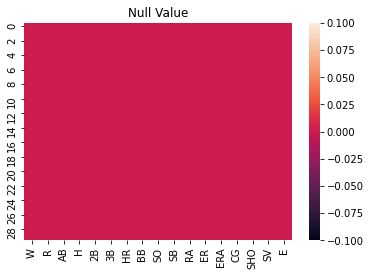

In [7]:
# Checking null values on heatmap.
plt.figure()
sns.heatmap(data.isnull())
plt.title('Null Value')
plt.show()

In [8]:
# Checking description of dataset.
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Here we can see there are the value caount of each column is 30 and no negetive values are present in dataset. So that we can move for Data Visualization.


# Univariate Analysis

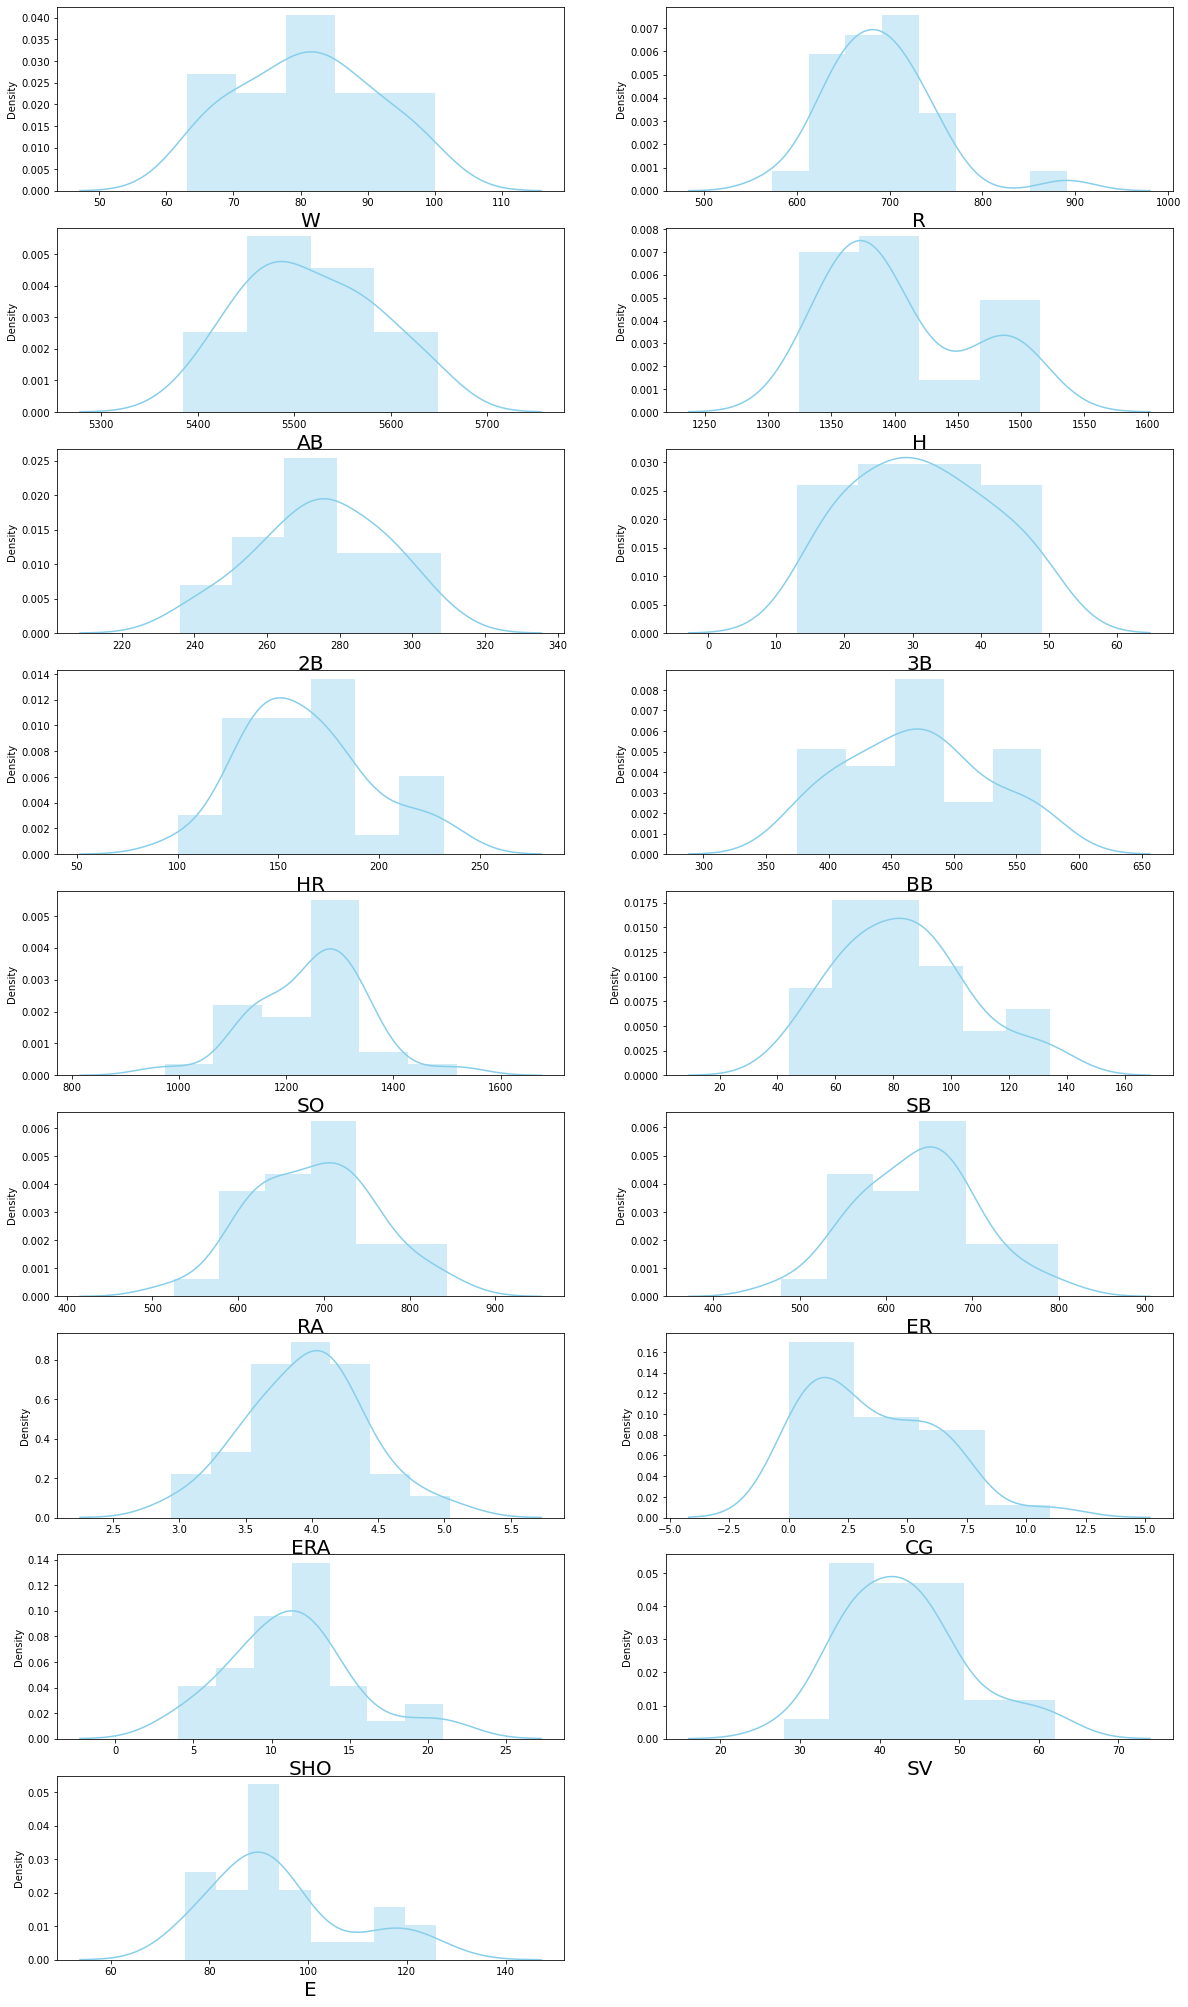

In [9]:
#Ploting Distribution plot chart
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(data[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

Except R,SO,CG and E , All the columns seems normally distributed. 

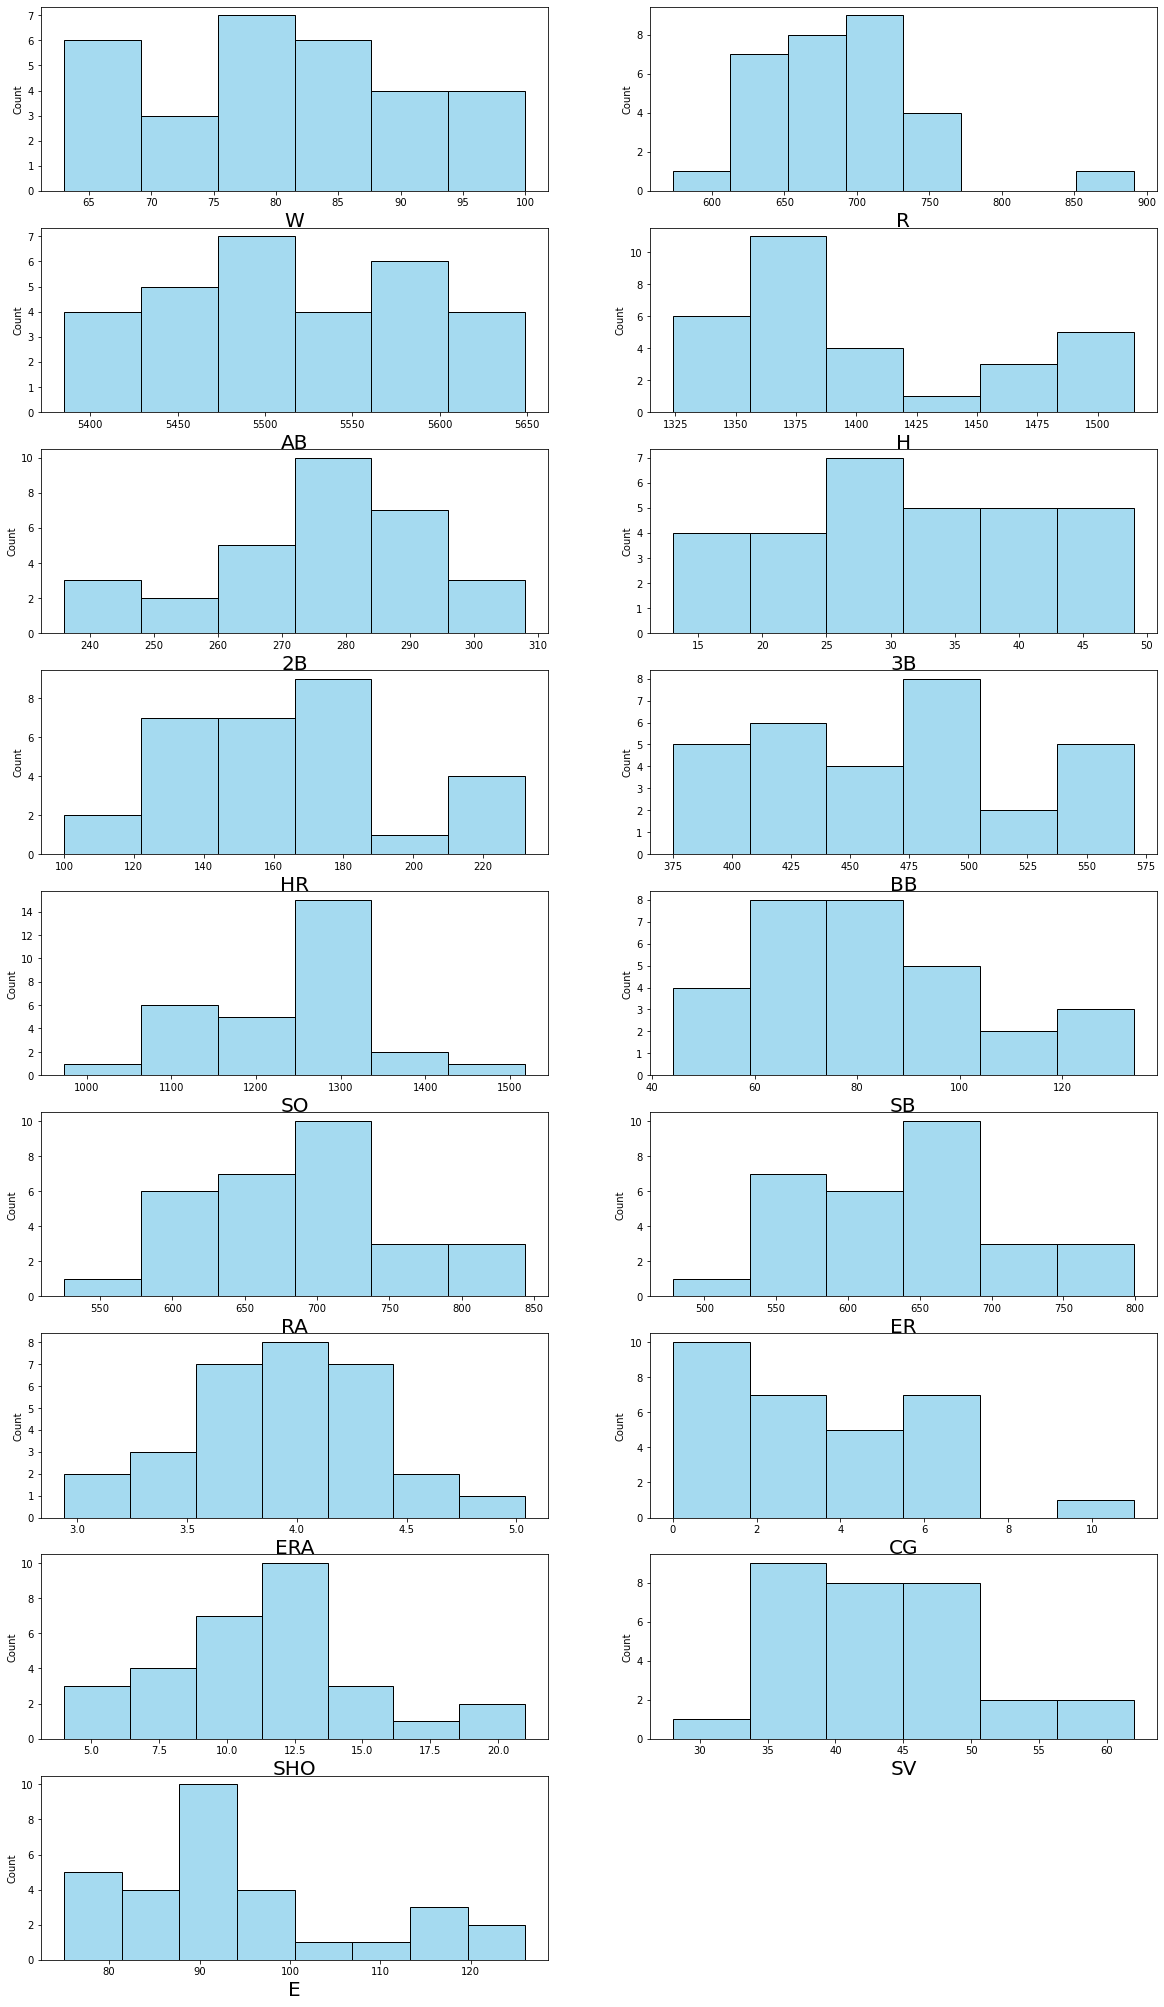

In [10]:
#Ploting Histogram chart
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(data[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

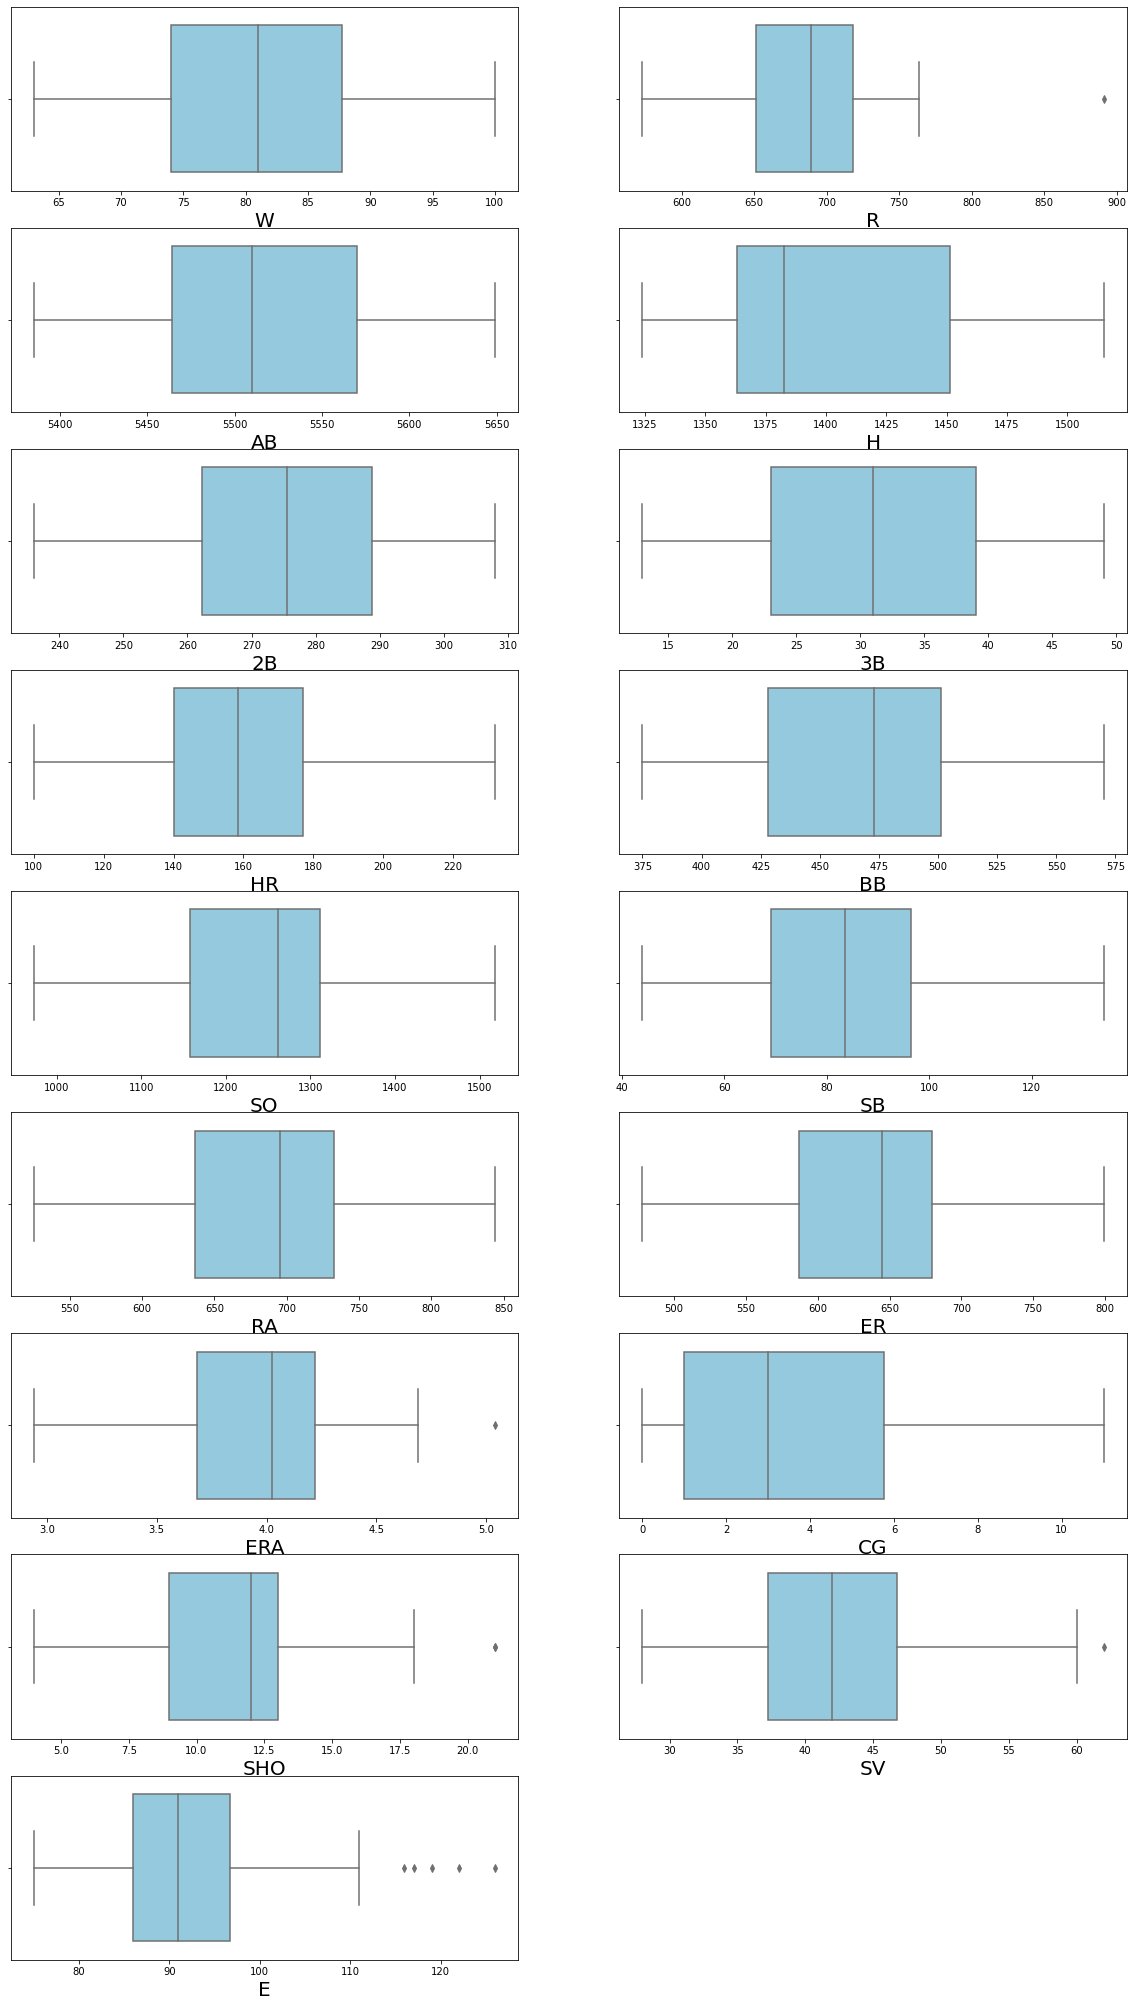

In [11]:
#ploting box plot chart
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(data[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

# Bivariate Analysis

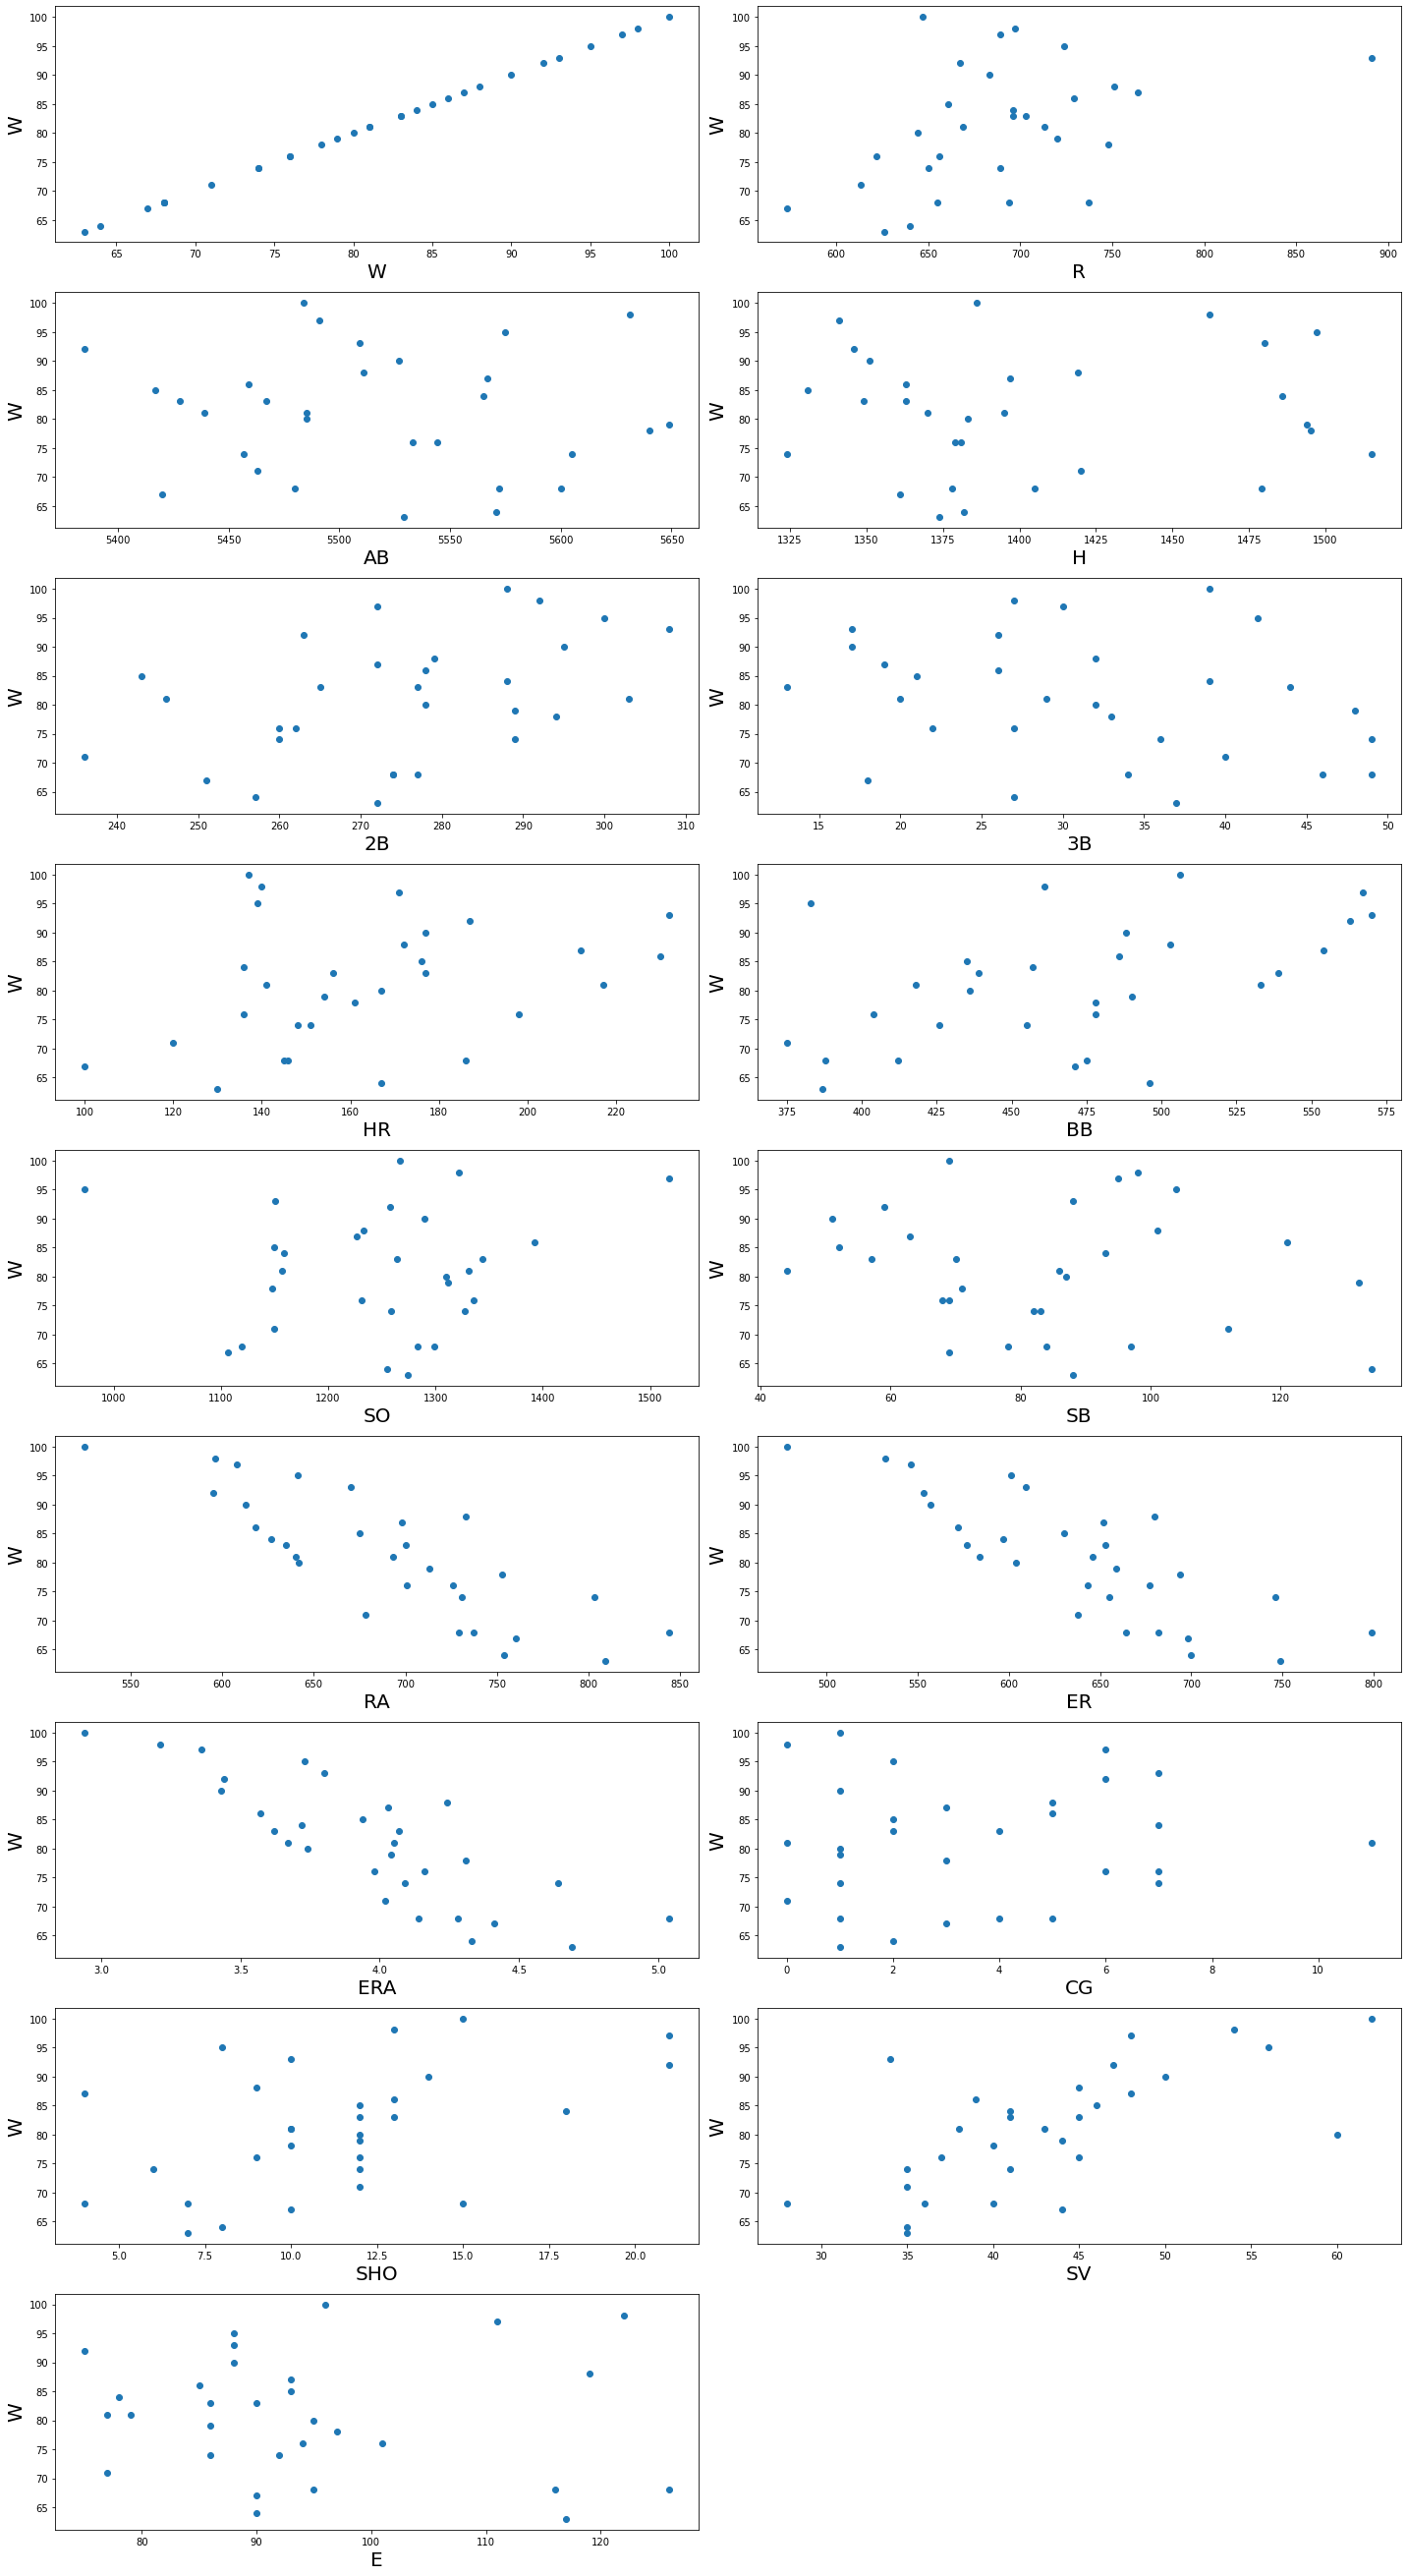

In [12]:
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=20:
        ax = plt.subplot(10,2,plotnumber)
        plt.scatter(data[column],data['W'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W' , fontsize=20)
    plotnumber +=1
plt.tight_layout()

<Figure size 1800x1440 with 0 Axes>

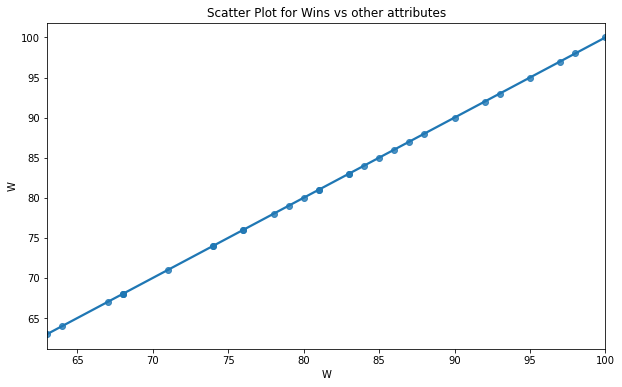

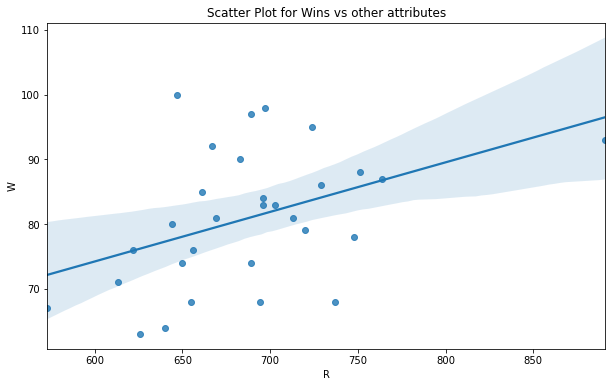

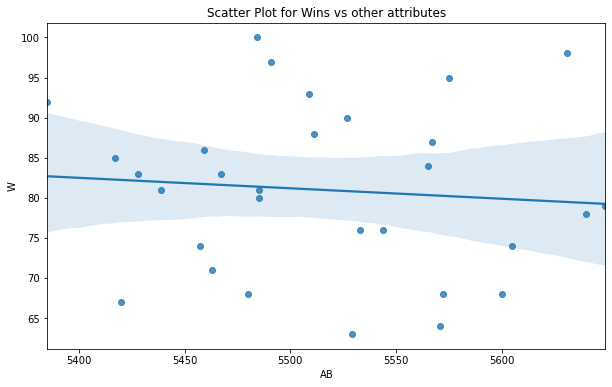

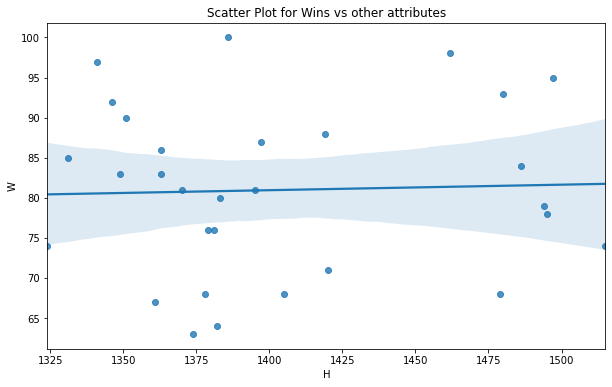

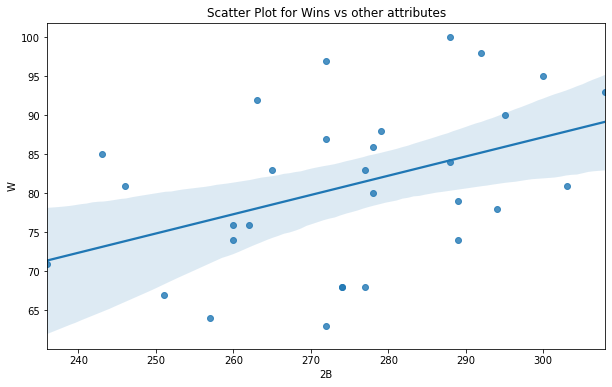

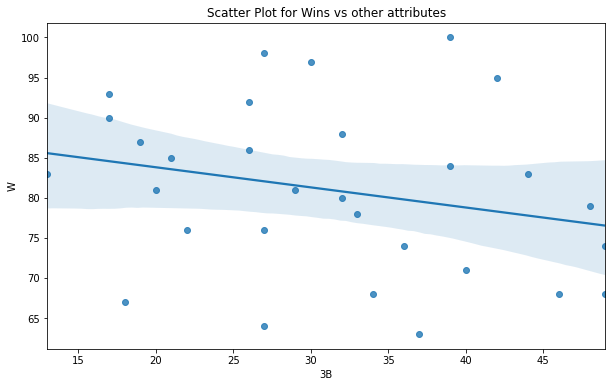

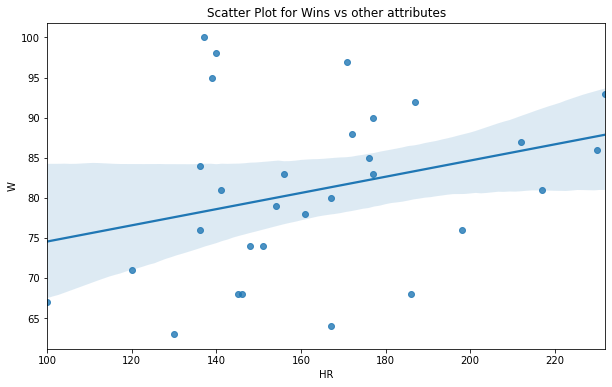

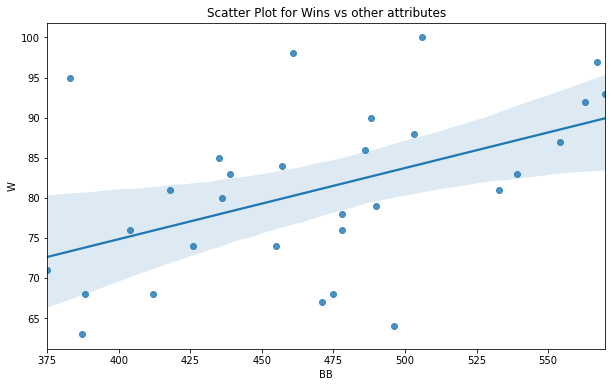

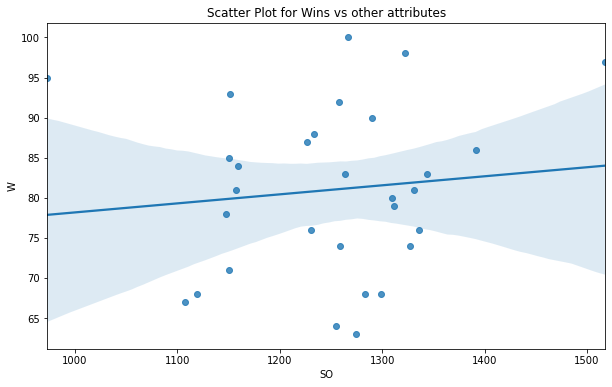

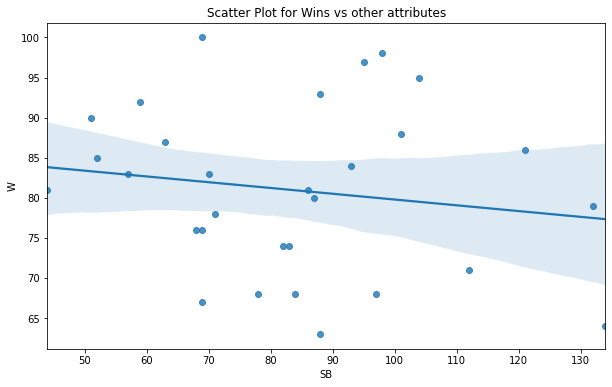

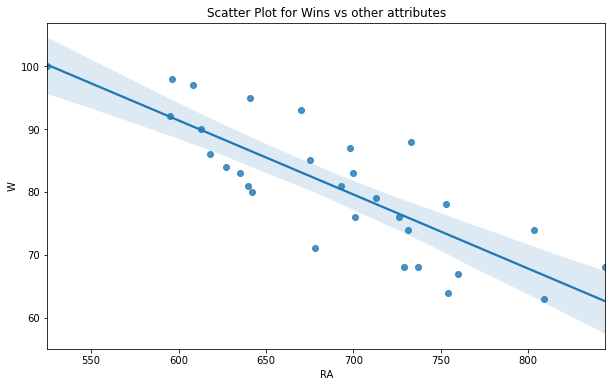

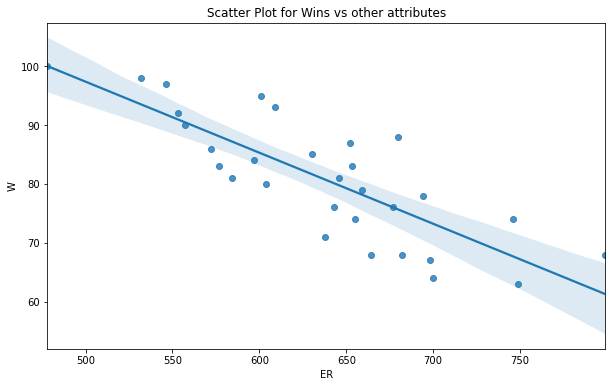

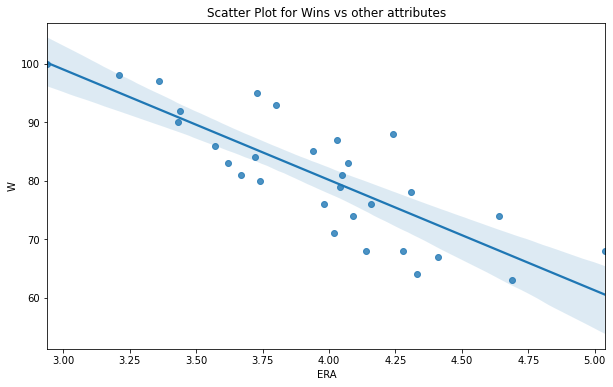

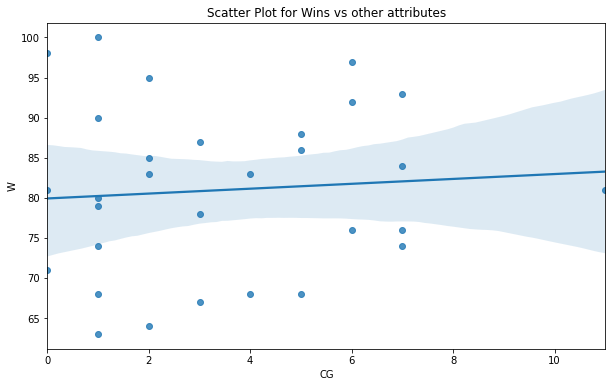

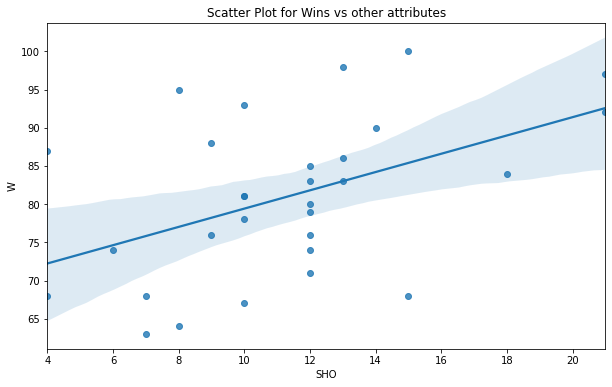

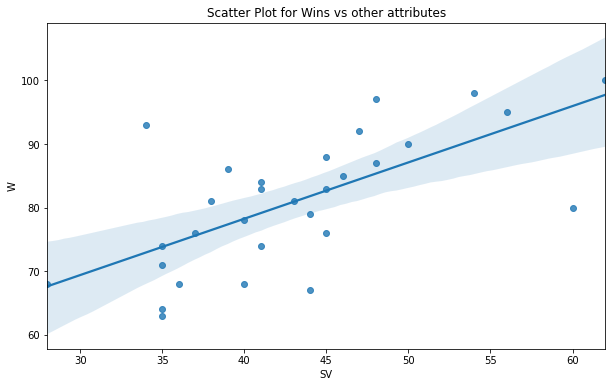

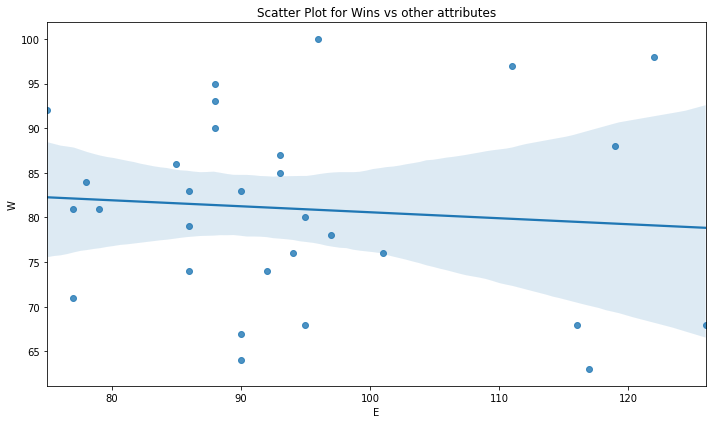

In [13]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(data[column], data['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

RA,ER,ERA have good relationship with Win and rest column data has Scattered.

# Multivariate Analysis

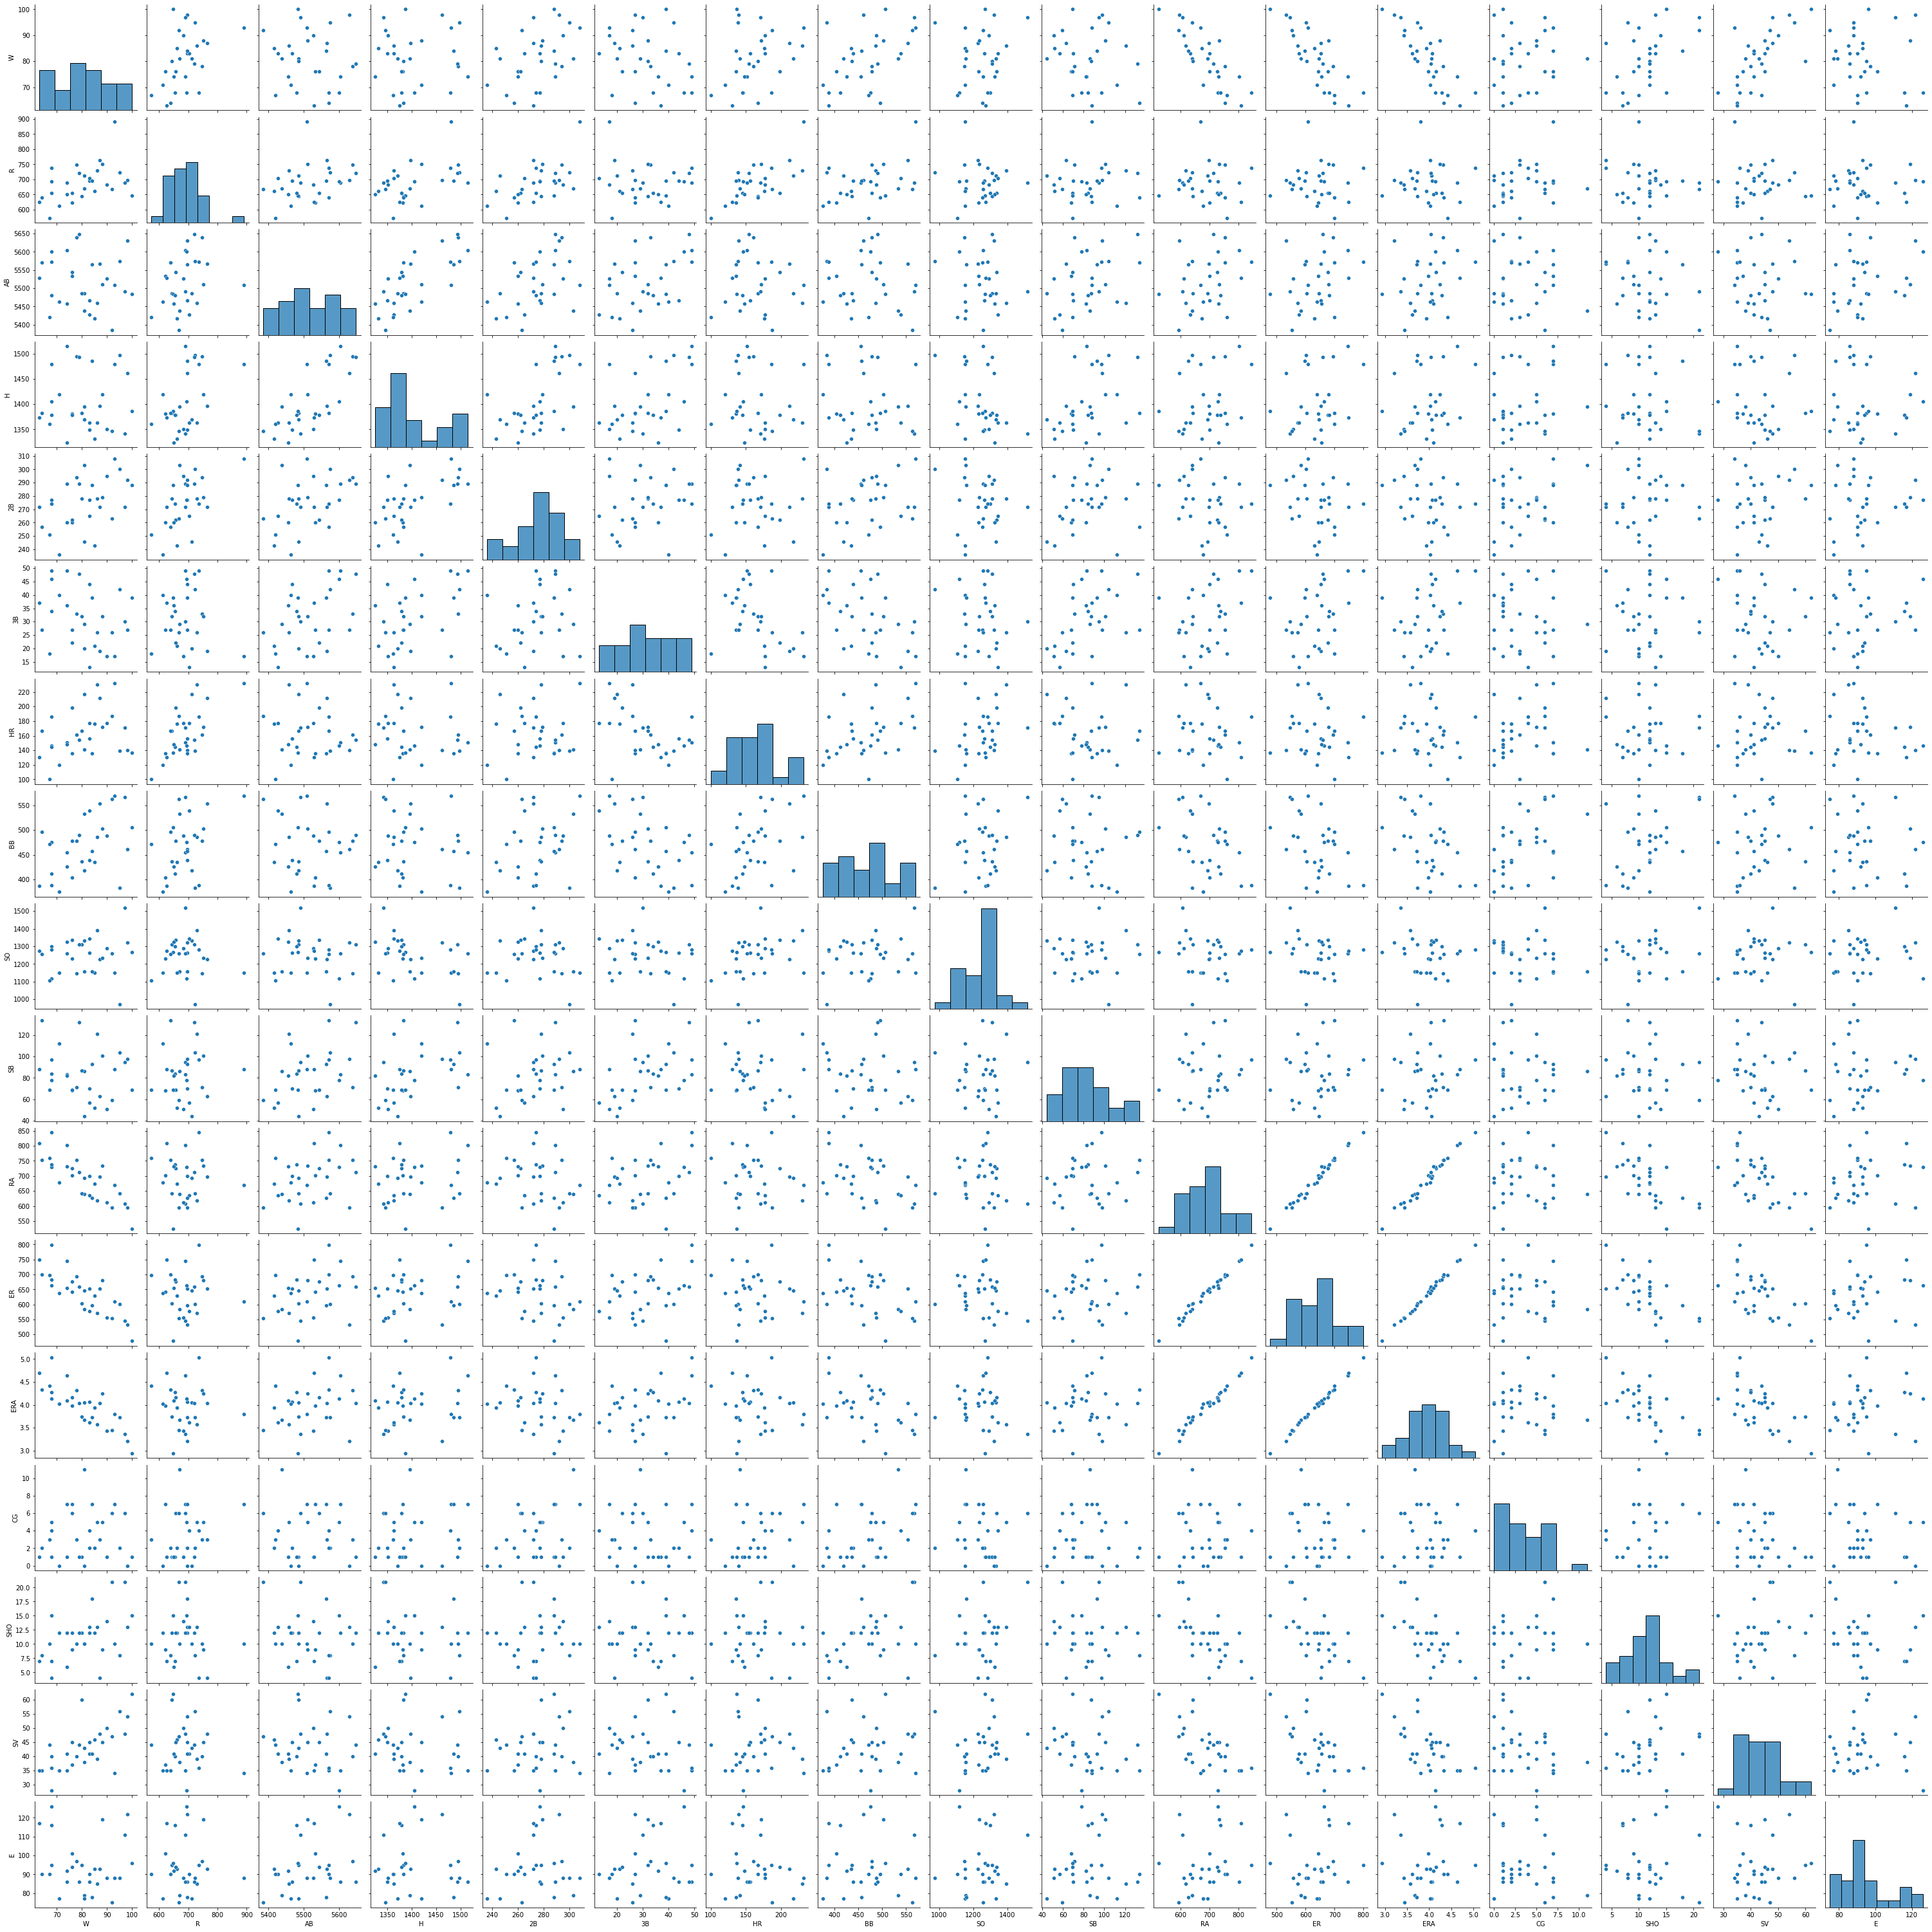

In [14]:
sns.pairplot(data)
plt.show()

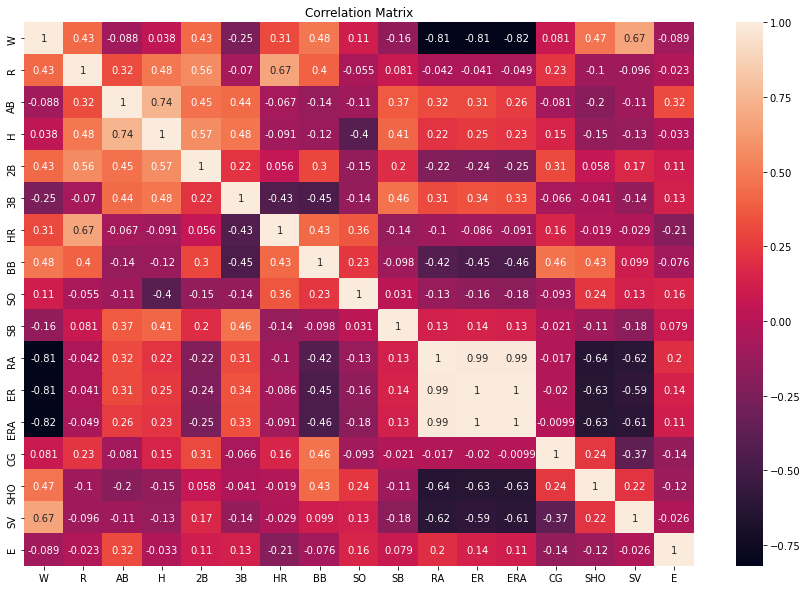

In [15]:
#plotting Heatmap
plt.figure(figsize = [15,10])
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

ER,ERA,RA are highly corrrelated wuth each other and also these columns are highly negetively correlated with our target column Wins'W'. It means there is high impact of these column on Winning. Here we are droping two columns(ER,RA) because they have same kind of affects on Wins and that will not affect the prediction model.  

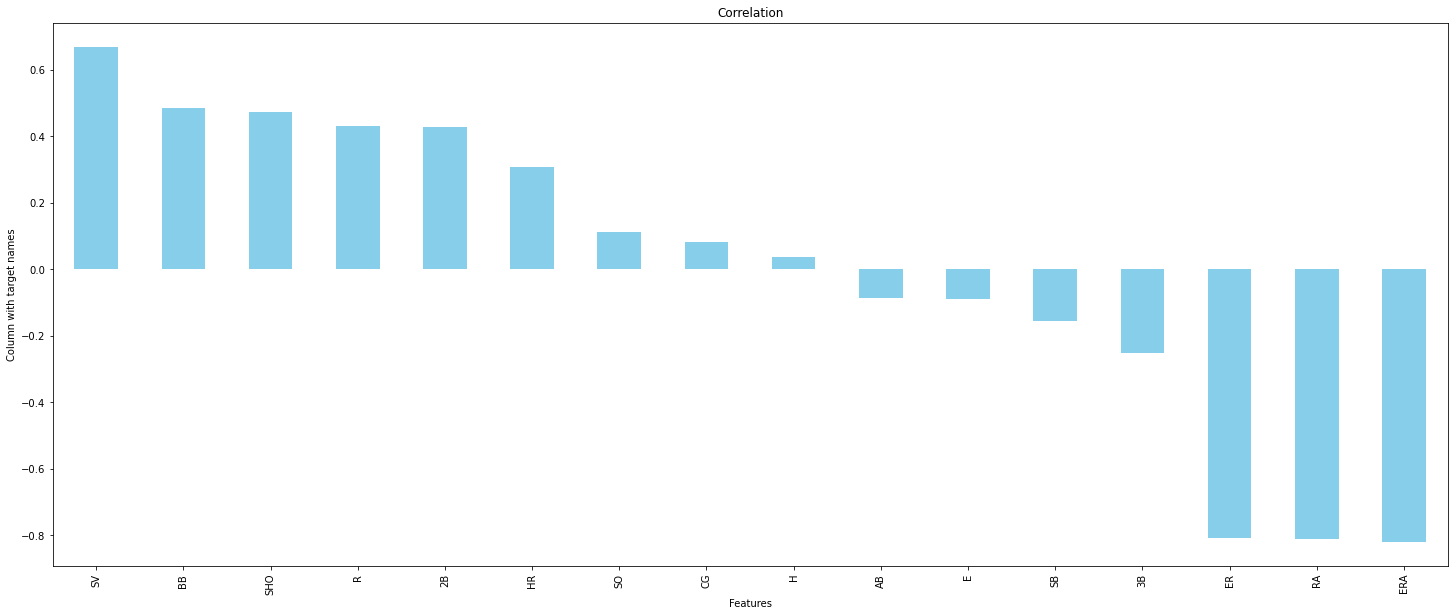

In [16]:
plt.figure(figsize = (25,10))
data.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color = 'skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Here, we can see ER,RA,ERA have strongest correlation with wins in negative nature.


In [17]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Checking for outliers

<AxesSubplot:>

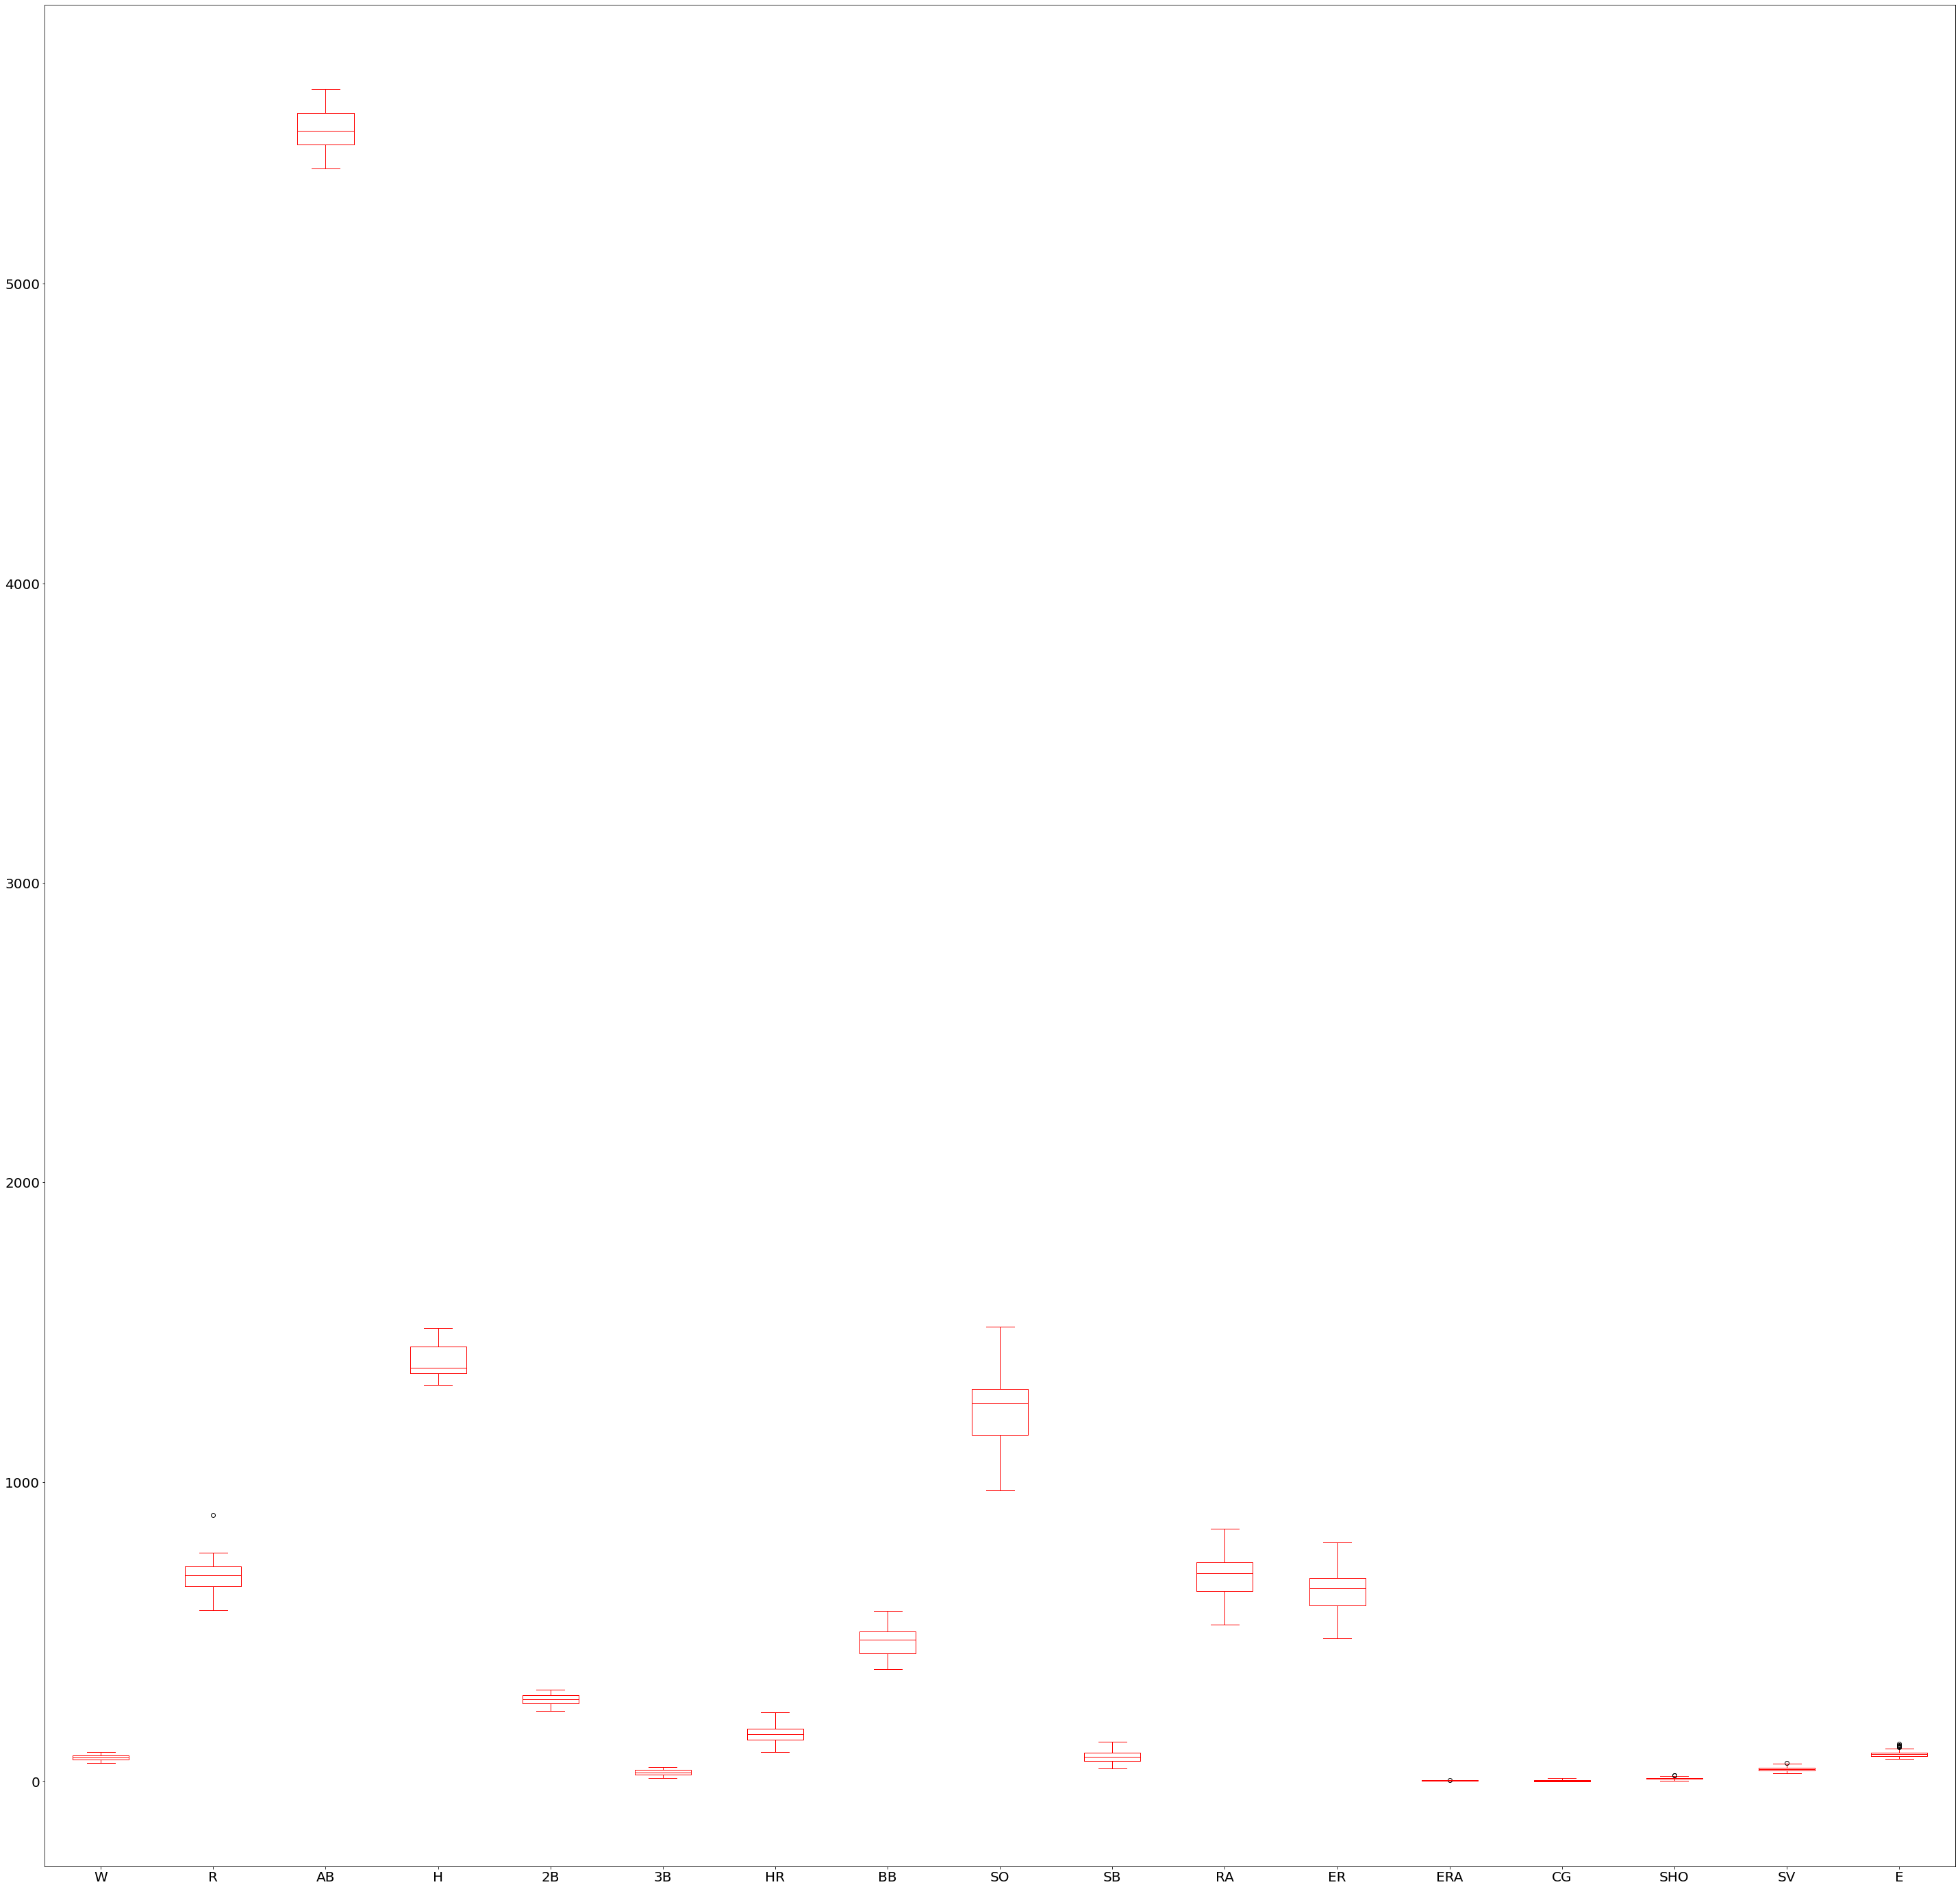

In [18]:
data.plot(kind = 'box',fontsize = 20,figsize= (50,50),color ='r')


By observing the box plot we can say that there are outliers present in 
R - Runs
ERA - Earned Run Average
SHO - Shutouts
SV - Saves
E - Errors
Now we need to remove the outliers.

In [19]:
#using Z-score method 
features = data[['R','ERA','SHO','SV','E']]

In [20]:
import numpy as np
from scipy.stats import zscore
ZS =np.abs(zscore(features))
new_df=data[(ZS<3).all(axis=1)]
new_df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


We have removed outliers by using Zscore method.

In [21]:
#Checking shape of new dataset
new_df.shape

(29, 17)

After removing the ouliers, there are 29 rows and 17 columns.

In [22]:
#Checking shape of old dataset
data.shape

(30, 17)

Here we can see that there is some data loss after removing the outliers.

In [23]:
# Checking the data loss
dl = ((30-29)/30*100)
dl

3.3333333333333335

# Checking for Skewness 

In [24]:
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

There are skewness present in H,CG,SHO,SV and E. Now we need to remove the skewness from dataset.

In [25]:
skew_features = [["H","CG","SHO","SV","E"]]

In [26]:
#Removing skewness in H using log1p
new_df["H"]=np.log1p(new_df["H"])

In [27]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [34]:
new_df[["CG","SHO","SV","E"]] = scaler.fit_transform(new_df[["CG","SHO","SV","E"]].values)

In [35]:
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.641295
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.006996
SHO    0.032659
SV    -0.033949
E     -0.015812
dtype: float64

In [37]:
#Splitting the columns
x = new_df.drop('W',axis=1)
y = new_df['W']

Where x= Feature and y = Taget 

# Scaling data using Standard Scaler

In [67]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [68]:
sts = StandardScaler()
X = pd.DataFrame(sts.fit_transform(x),columns=x.columns)
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.685685,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.318538,-0.788487,1.525342,-0.331782
1,0.331147,-0.702831,-0.970749,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.318538,0.231784,0.316899,-0.528395
2,-0.274666,-1.100253,-0.063674,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.045861,-0.257733,-0.661518,-1.343100
3,-1.329231,0.233951,-0.322838,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.272829,-0.517144,-0.819468,0.661049
4,0.174084,1.255894,1.977245,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.272829,0.231784,-1.151562,-0.528395


# Variance inflation factor 

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif=pd.DataFrame()
Vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
Vif["Features"]=X.columns
Vif


,vif_Features,Features
0,7.011438,R
1,20.429954,AB
2,9.918568,H
3,3.536155,2B
4,3.251765,3B
5,8.777385,HR
6,3.278904,BB
7,2.819556,SO
8,1.954314,SB
9,205.821610,RA


Multicolinearity present in RA,ER,ERA. So we are droping RA and ER to avoid multicolinearity.

In [70]:
#Droping ER
X = X.drop(["ER"],axis=1)

In [71]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.685685,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.318538,-0.788487,1.525342,-0.331782
1,0.331147,-0.702831,-0.970749,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.318538,0.231784,0.316899,-0.528395
2,-0.274666,-1.100253,-0.063674,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.045861,-0.257733,-0.661518,-1.343100
3,-1.329231,0.233951,-0.322838,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.272829,-0.517144,-0.819468,0.661049
4,0.174084,1.255894,1.977245,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.272829,0.231784,-1.151562,-0.528395


In [72]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,5.860469,R
1,8.086689,AB
2,9.236899,H
3,3.231196,2B
4,3.143357,3B
5,7.431788,HR
6,3.275388,BB
7,2.791720,SO
8,1.791375,SB
9,148.896990,RA


Varience inflation factor is still high for two column RA and ERA .

In [73]:
#Droping ERA
X = X.drop(["ERA"],axis=1)

In [74]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,5.800745,R
1,5.198748,AB
2,7.351374,H
3,3.173178,2B
4,2.990518,3B
5,6.015688,HR
6,2.996611,BB
7,2.290064,SO
8,1.780949,SB
9,4.682800,RA


There is no multicollinearity in dataset.

# Finding best random state

In [80]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9768653905198815
At random state0, The test accuracy is :-0.506121409607772


At random state1, The training accuracy is :-0.97589357776833
At random state1, The test accuracy is :-0.19816713254955642


At random state2, The training accuracy is :-0.9633073153604744
At random state2, The test accuracy is :--0.27940956274367745


At random state3, The training accuracy is :-0.9676822950155025
At random state3, The test accuracy is :-0.6927859030329133


At random state4, The training accuracy is :-0.9677883928549073
At random state4, The test accuracy is :-0.7667041090858638


At random state5, The training accuracy is :-0.9614201935351026
At random state5, The test accuracy is :-0.6263146232488456


At random state6, The training accuracy is :-0.972342433396165
At random state6, The test accuracy is :-0.7542162286823144


At random state7, The training accuracy is :-0.9617374260045489
At random state7, The test accuracy is :-0.294195284588

Random state 99 is giving highests accuracy.

In [84]:
#Splitting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [85]:
x_train.shape

(22, 16)

In [86]:
y_train.shape

(22,)

In [88]:
x_test.shape

(7, 16)

In [89]:
y_test.shape

(7,)

# Model building

In [93]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error

# Linear Regression 

In [94]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9630145238241409


In [95]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 24.6786634820737
MAE: 4.746931071468566
r2_score: 0.8762826818246903


# SGD Regressor

In [97]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -1.5600510427163157e+31
MSE: 2.1165753738730752e+33
MAE: 4.5998972800018104e+16
RMSE: 4.600625363875084e+16


# Lasso Regressor

In [98]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 10, 'random_state': 0}


In [99]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8170497420656234
MSE: 24.82149621934155
MAE: 4.8138728700521485
RMSE: 4.98211764406879


# Ridge Regressor

In [100]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [101]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8411287631291586
MSE: 21.55461189219088
MAE: 4.393840937458831
RMSE: 4.642694464660676


# Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 32.491389, 20.455281
R   : 34.307284, 30.818187
svr   : 105.991303, 78.548955
svr_p   : 111.892243, 79.769085
svr_r   : 112.275529, 79.777716
RF   : 39.990837, 23.773705
DTR   : 67.016667, 48.681302
GBR   : 47.539075, 31.069819


# Hyper Parameter Tuning

In [103]:
parameter = {'alpha':[0.01,0.1,1.0,10.26],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

In [104]:
GVC=GridSearchCV(Lasso(),parameter,cv=5)


In [105]:
GVC.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [106]:
GVC.best_params_


{'alpha': 0.1,
 'fit_intercept': 'bool',
 'max_iter': 2,
 'selection': 'random',
 'tol': 1000}

In [107]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 78.05995582351646
mean_squared_error: 29.766819119441355
mean_absolute_error: 4.228246618290547
RMSE value: 5.455897645616288


After using hyper parameter tuning we got 78% accuracy which is good.
